In [140]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os

## 1 - Load Dataframes

In [141]:
# All season directories
all_csvs = [s for s in os.scandir('Relationship_extracts') if 'rel_df' in s.name]

# Sort directories
all_csvs.sort(key=lambda x: x.name)

In [142]:
dataframes = []

for csv in all_csvs:
    cur_csv = pd.read_csv(csv, header=0, index_col=0)
    dataframes.append(cur_csv)

### 1.1 - Filter Weak Relationships

In [143]:
# Introducing a filter helps visualizing main character arks more easily. Adjust as you like :)
fil_dfs = []
counter = 0
filters = [10, 3, 2, 2, 3, 1, 2, 1]

for df in dataframes:
    fil = filters[counter]
    print(fil)
    cur_df = df.loc[df['value'] > fil]
    fil_dfs.append(cur_df)
    counter += 1

10
3
2
2
3
1
2
1


## 2 - Create Graphs

### 2.1 - Graph draft with nx.network

In [144]:
season_graphs = []

In [145]:
for df in fil_dfs:
    G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='value', create_using=nx.Graph())
    season_graphs.append(G)

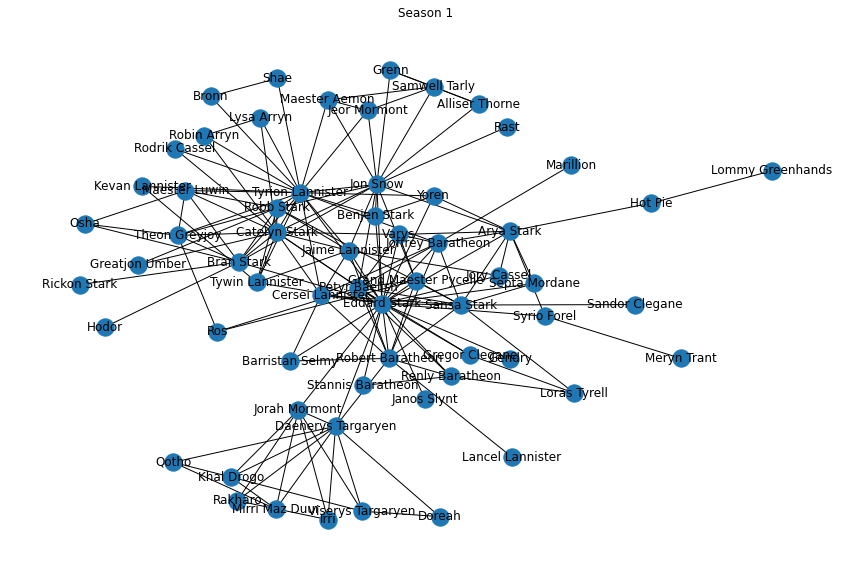

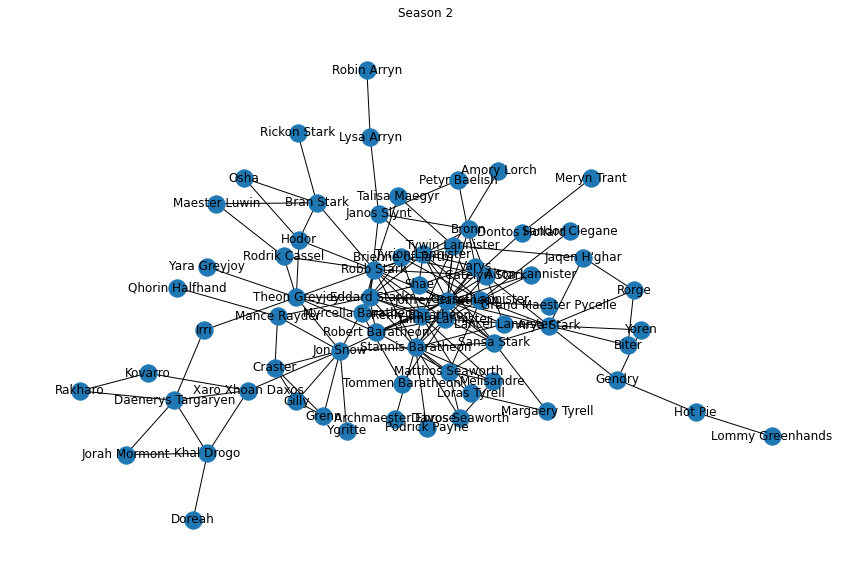

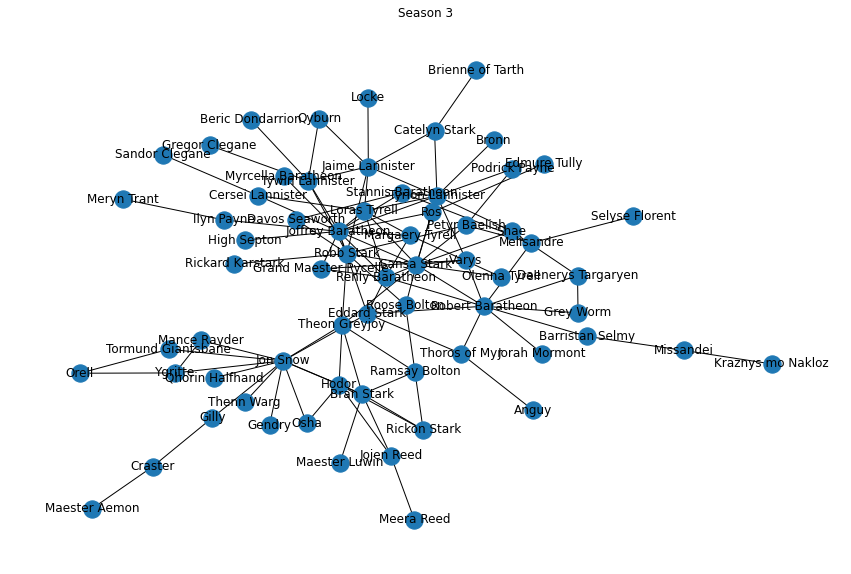

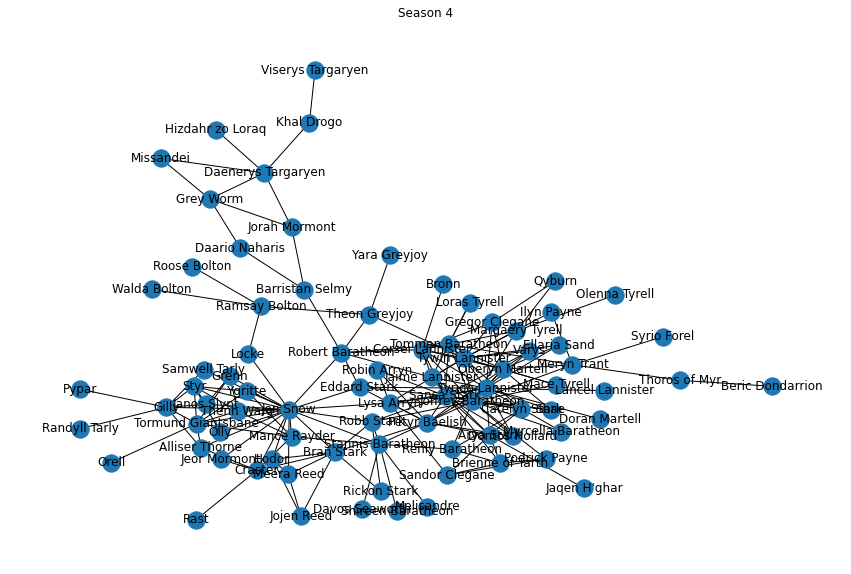

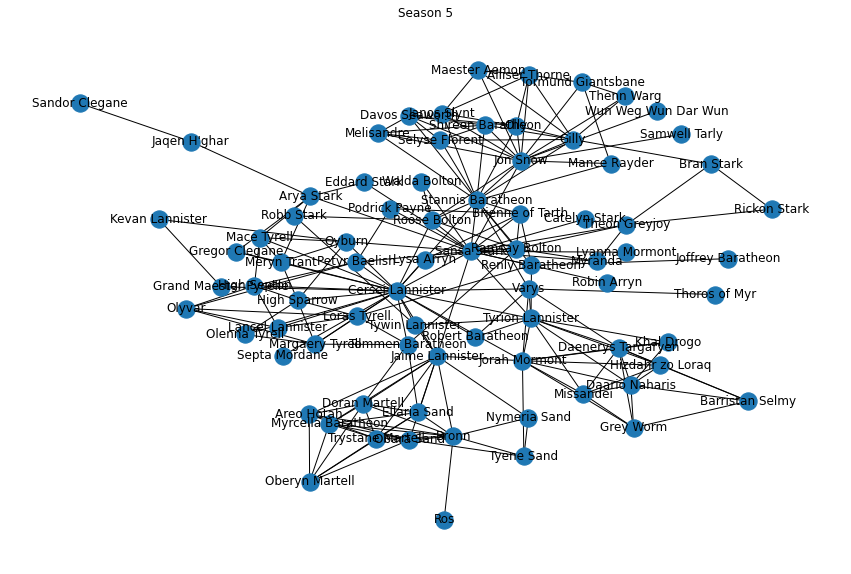

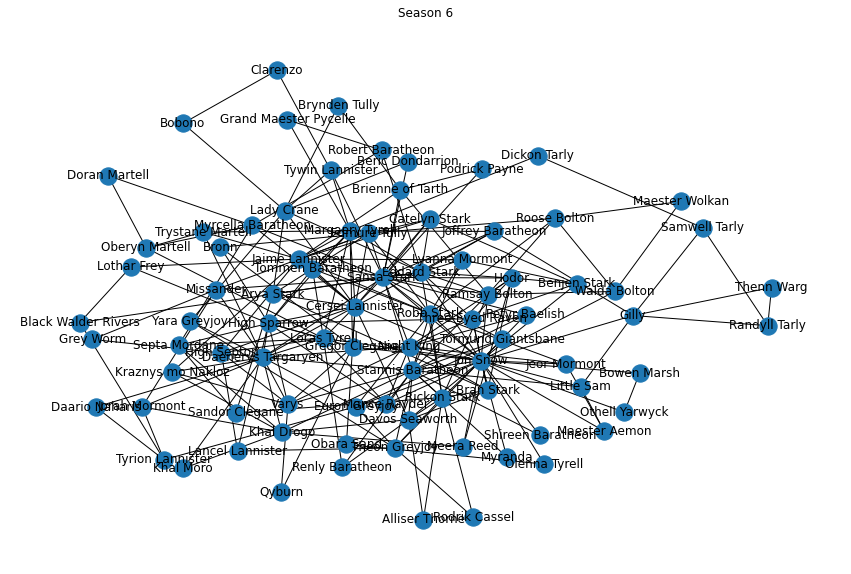

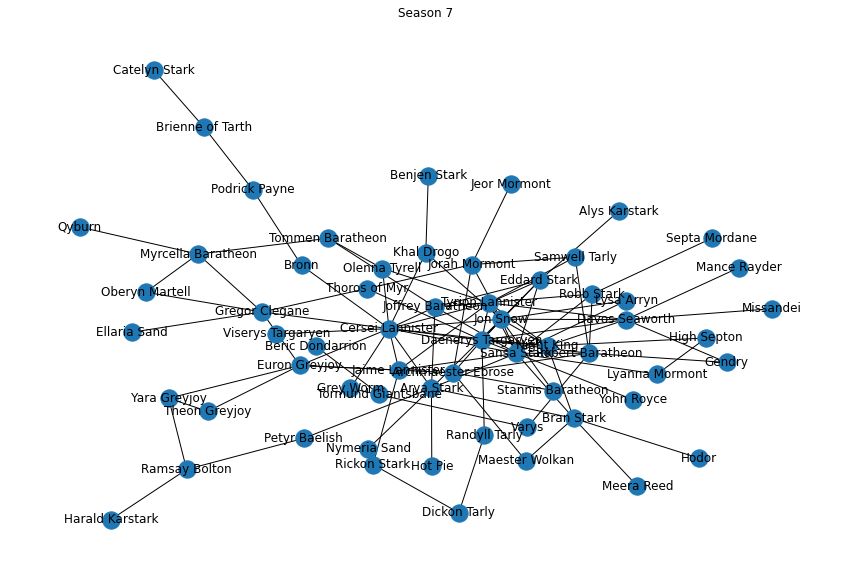

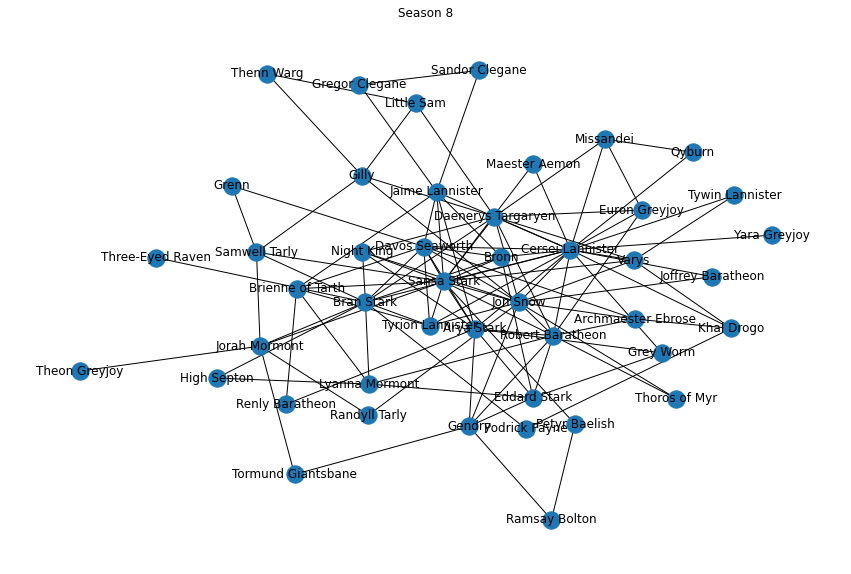

In [146]:
counter = 1
for g in season_graphs:
    plt.figure(counter,figsize=(15,10))
    plt.title('Season '+str(counter))
    pos = nx.kamada_kawai_layout(g)
    nx.draw(g, with_labels=True, edge_cmap=plt.cm.Blues, pos = pos)
    counter += 1

## 3 - Graph Visualization

In [147]:
from pyvis.network import Network
import community as community_louvain

### 3.1 - Create communities

In [148]:
for g in season_graphs:
    communities = community_louvain.best_partition(g)
    nx.set_node_attributes(g, communities, 'group')

### 3.2 - Create interactive graphs as html

In [149]:
counter = 1

for g in season_graphs:
    com_net = Network(notebook = True, width = '1500px', height='820px', bgcolor='#222222', font_color='white')
    com_net.from_nx(g)
    cur = 'Season_'+str(counter)+'.html'
    com_net.show(cur)
    counter += 1